<h1 align=center><font size = 10> Recommender Systems </font></h1>

# Chuẩn bị dữ liệu

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

## Task 1: Đọc dữ liệu creadits và movies và kết hợp 2 dữ liệu thành một dataframe. 

In [2]:
# Nhập code của bạn tại đây
credits_df = pd.read_csv('credits.csv')
movies_df = pd.read_csv('movies.csv')
df = movies_df.merge(credits_df.drop(columns='title'), left_on='id', right_on='movie_id').drop(columns='movie_id')
print('df shape: ', df.shape)
df.head()

df shape:  (4803, 22)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


Điều chỉnh định dạng của một số cột dữ liệu để có thể xử lý dữ liệu hiệu quả hơn về sau.

In [3]:
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df[feature] = df[feature].apply(literal_eval)

# **Demographic Filtering**

Với loại đề xuất trong phần này, chúng ta cần

* Một số liệu để chấm điểm hoặc xếp hạng phim
* Tính điểm cho mỗi bộ phim
* Sắp xếp điểm số và giới thiệu bộ phim được đánh giá tốt nhất cho người dùng.

Chúng ta có thể sử dụng đánh giá trung bình làm điểm số nhưng điều này không công bằng. Sự không công bằng này diễn ra khi một bộ phim có đánh giá trung bình là 8.9 nhưng chỉ với 3 lần đánh giá và không được coi là tốt hơn một bộ phim khác có đánh giá trung bình là 7.8 nhưng lại có 40 lần đánh giá.

Do đó chúng ta sẽ sử dụng phương pháp IMDB's weighted rating (wr) cho vấn đề này.

![](https://image.ibb.co/jYWZp9/wr.png)

Trong đó:

* v: số lượng đánh giá cho mỗi bộ phim.
* m: số đánh giá tối thiểu cần thiết để được liệt kê.
* R: đánh giá trung bình của mỗi bộ phim.
* C: giá trị trung bình của các đánh giá trung bình của từng bộ phim.

Chúng ta đã có v(**vote_count**), R(**vote_average**) và C có thể tính được 

## Task 2: Xây dựng hàm tính weighted_rating

Tính giá trị C

In [4]:
# Nhập code của bạn tại đây
C = df['vote_average'].mean()
C

6.092171559442011

Tính giá trị m. Sử dụng số lượng vote chiếm 90% của toàn bộ dữ liệu để thiết lập cho m. Điều này có nghĩa là một bộ phim sẽ được đưa vào so sánh nếu số lượng đánh giá ít nhất bằng 90% của toàn bộ dữ liệu.

In [5]:
# Nhập code của bạn tại đây
m = df['vote_count'].quantile(0.9)
m

1838.4000000000015

Xây dựng hàm tính weighted_rating

In [6]:
# Nhập code của bạn tại đây
def weighted_rating(df):
    v = df['vote_count']
    R = df['vote_average']
    C = df['vote_average'].mean()
    m = df['vote_count'].quantile(0.9)
    df['score'] = ((v / (v + m)) * R) + ((m / (v + m)) * C)
    return df['score']

## Task 3: Tính điểm cho từng bộ phim từ hàm weighted_ratings và đề xuất phim

Lọc những bộ phim có số lượng đánh giá ít nhất bằng m

In [7]:
# Nhập code của bạn tại đây
q_movies = df.copy()
q_movies[q_movies['vote_count'] >= m].shape

(481, 22)

Tính điểm cho từng bộ phim bằng hàm weighted_rating

In [8]:
# Nhập code của bạn tại đây
weighted_rating(q_movies)

0       7.050669
1       6.665696
2       6.239396
3       7.346721
4       6.096368
          ...   
4798    6.150380
4799    6.091650
4800    6.095125
4801    6.090684
4802    6.093965
Name: score, Length: 4803, dtype: float64

Đề xuất 10 bộ phim dựa vào phương pháp đề xuất Demographic Filtering

In [9]:
# Nhập code của bạn tại đây
q_movies = q_movies.sort_values('score', ascending=False)
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


## Task 4: Trực quan biểu đồ trực quan 10 bộ phim phổ biến nhất hiện nay bằng chỉ số popularity.

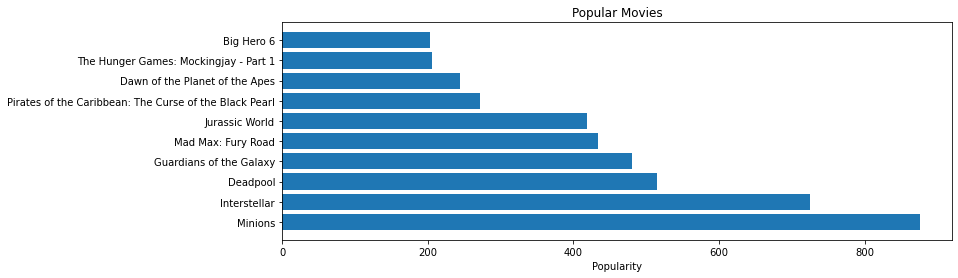

In [10]:
# Nhập code của bạn tại đây
pop_df = df[['popularity', 'title']].sort_values(['popularity'], ascending=False).head(10)
plt.figure(figsize=(12,4))
plt.barh(pop_df['title'], pop_df['popularity'])
plt.title('Popular Movies')
plt.xlabel('Popularity')
plt.show()

# **Content Based Filtering**

Trong hệ thống đề xuất này, nội dung của phim (overview, cast, crew, keyword, v.v.) được sử dụng để tìm sự tương đồng của giữa các bộ phim. Sau đó, những bộ phim có nhiều khả năng tương tự nhất được đề xuất.

Chúng ta sẽ tính toán điểm tương đồng theo từng cặp cho tất cả các phim dựa trên mô tả cốt truyện của chúng và đề xuất các phim dựa trên điểm tương đồng đó. Mô tả cốt truyện được đưa ra trong đặc trưng **overview** của tập dữ liệu của chúng tôi.

In [11]:
df['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

Trước hết, vì đặc trưng **overview** là chuỗi, do đó chúng ta không thể làm việc với chúng. Do đó chúng ta sẽ sử dụng một phương pháp là tính toán vector Term Frequency-Inverse Document Frequency (TF-IDF) cho từng **overview**.

Term Frequency(TF) tần xuất xuất hiện của từ trong văn bản. Còn Inverse Document Frequency (IDF) là mức độ quan trọng của từ.

Công thức:

* TF = (số lần từ t xuất hiện trong văn bản d) / (tổng số từ trong văn bản d)
* IDF(t, D) = log(tổng số lượng văn bản trong bộ dữ liệu D/số lượng văn bản trong bộ dữ liệu D có từ t)

Điều này sẽ cung cấp cho bạn một ma trận trong đó mỗi cột đại diện cho một từ trong từ vựng tổng quan (tất cả các từ xuất hiện trong ít nhất một tài liệu) và mỗi hàng đại diện cho một bộ phim hay cụ thể là một overview.



## Task 5: Tính IF-IDF cho toàn bộ overview

Xử lý dữ liệu bị khuyết cho overview. Thay thế Na bằng chuỗi trống: "".

In [12]:
df[df['overview'].isnull()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
2656,15000000,"[{'id': 18, 'name': 'Drama'}]",NaN,370980,"[{'id': 717, 'name': 'pope'}, {'id': 5565, 'na...",it,Chiamatemi Francesco - Il Papa della gente,NaN,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]",...,0,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,NaN,Chiamatemi Francesco - Il Papa della gente,7.3,12,"[{'cast_id': 5, 'character': 'Jorge Mario Berg...","[{'credit_id': '5660019ac3a36875f100252b', 'de..."
4140,2,"[{'id': 99, 'name': 'Documentary'}]",NaN,459488,"[{'id': 6027, 'name': 'music'}, {'id': 225822,...",en,"To Be Frank, Sinatra at 100",NaN,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]",...,0,NaN,[],Released,NaN,"To Be Frank, Sinatra at 100",0.0,0,"[{'cast_id': 0, 'character': 'Narrator', 'cred...","[{'credit_id': '592b25e4c3a368783e065a2f', 'de..."
4431,913000,"[{'id': 99, 'name': 'Documentary'}]",NaN,292539,[],de,Food Chains,NaN,0.795698,[],...,0,83.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Food Chains,7.4,8,[],"[{'credit_id': '5470c3b1c3a368085e000abd', 'de..."


In [13]:
# Nhập code của bạn tại đây
df['overview'] = df['overview'].replace(np.nan,"")

In [14]:
df[df['overview'].isnull()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Nhập code của bạn tại đây
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['overview'])

tfidf_matrix.shape

(4803, 21262)

Với ma trận này, chúng ta đã có thể tính toán giá trị tương tự cho cặp overview.Có nhiều cách để tính giá trị tương tự như euclidean, Pearson and cosine similarity. Trong bài toán này chúng ta sẽ sử dụng similarity để tính giá trị tương tự.

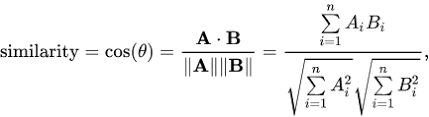

## Task 6: Tính ma trận tương tự cho overview từ TF-IDF

Ma trận này có kích thước nxn, trong đó n là số lượng overview.

Giá trị cột i dòng j trả về mức độ tương tự của overview thứ i và overview thứ j.

In [16]:
from sklearn.metrics.pairwise import linear_kernel

# Nhập code của bạn tại đây
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

cosine_sim.shape

(4803, 4803)

## Task 7: Xây dựng hàm để đề xuất phim dựa vào tổng quan của phim

Hàm sẽ được xây dựng bằng các bước nhỏ sau:

* Lấy index của bộ phim thông qua title.

* Lấy danh sách giá trị tương đồng của bộ phim cụ thể theo index so với tất cả các bộ phim. Chuyển nó thành một danh sách các bộ giá trị trong đó phần tử đầu tiên là index và phần tử thứ hai là giá trị tương tự.

* Sắp xếp danh sách trên theo giá trị tương tự giảm dần.

* Lấy ra 10 phần tử đầu từ danh sách trên (10 phần tử này là 10 bộ phim có mức độ tương tự so với phim hiện tại mà ta muốn khuyến nghị). Chú ý là loại bỏ phần tử đầu tiên và bắt đầu lấy từ phẩn tử thứ 2 vì phần tử đầu tiên là chính bộ phim đó. Do là chính bộ phim đó nên giá trị tương tự rất lớn.

* Trả về tiêu đề theo index có trong danh sách 10 bộ phim mà ta muốn khuyến nghị.

Tạo một pandas Series với value là index của dữ liệu bộ phim, index là title của bộ phim.

In [17]:
# Nhập code của bạn tại đây
index_sr = pd.Series(df.index, index = df['title'])
index_sr

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [18]:
def get_recommendations(df, title, cosine_sim=cosine_sim):
    # Nhập code của bạn tại đây
    indx = index_sr[title]
    lst_sim = list(enumerate(cosine_sim[indx]))
    lst_sim.sort(key=lambda x: x[1], reverse=True)
    top_10 = lst_sim[1:11]
    movie_indx = list(i[0] for i in top_10)
    return df.iloc[movie_indx]['title']


Giả sử người dùng đang xem phim về 'The Dark Knight Rises', hãy thử sử dụng hàm đã thiết kế để xem 10 bộ phim mà chúng ta muốn đề xuất cho người dùng.

In [19]:
get_recommendations(df, 'The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
1181                                        JFK
210                              Batman & Robin
9            Batman v Superman: Dawn of Justice
Name: title, dtype: object

Bạn có thể thấy hầy hết các phim được trả về là phim của DC, tương tự như bộ phim mà người dùng đang xem.

Thực hiện lại điều này với một bộ phim của Marvel như 'The Avengers' 

In [20]:
get_recommendations(df, 'The Avengers')

7                   Avengers: Age of Ultron
3311                  Thank You for Smoking
4124                     This Thing of Ours
3144                                Plastic
588         Wall Street: Money Never Sleeps
4620                   Fighting Tommy Riley
1892                             The Losers
2433       Superman IV: The Quest for Peace
85      Captain America: The Winter Soldier
580                      Olympus Has Fallen
Name: title, dtype: object

Tiếp theo, chúng ta sẽ xây dựng một hệ thống đề xuất khác, ngoài việc chỉ sử dụng overview, chúng ta sẽ sử dụng các dữ liệu khác như 3 diễn viên hàng đầu (actor), đạo diễn, thể loại và keywords

Dữ liệu cột crew cho chúng ta biết được các nhân viên đã tham gia trong quá trình sản xuất phim. Do đó để có được dữ liệu về đạo diễn, bạn cần tách đạo diễn từ crew sang một cột director. 

## Task 8: Lấy ra tên tác giả từ cột crew và lưu vào cột director

In [21]:
# Nhập code của bạn tại đây
# Tạo hàm lấy tên director, vì 1 phim có thể có nhiều hơn 1 director nên tạo thành list chứa tên các director
def director(df):
    # input: dataframe
    # output: dataframe có thêm cột 'director'
    directors_lst = []
    for x in range(df.shape[0]):
        row_lst = df['crew'][x]
        count_lst = len(row_lst)
        lst=[]
        for y in range(count_lst):
            row_dic = row_lst[y]
            if row_dic['job'] == 'Director':
                lst.append(row_dic['name'])
        directors_lst.append(lst)    
    df['director'] = directors_lst
    return df

director(df)
df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...",[James Cameron]
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",[Gore Verbinski]
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de...",[Sam Mendes]


## Task 9: Lấy ra 3 diễn viên đầu tiên từ cột cast và lưu vào chính cột cast. Làm điều tương tự với keywords và genres

In [22]:
# Nhập code của bạn tại đây
# Tạo hàm lấy ra 3 tên đầu tiên
def first_three(df, feature):
    # input: dataframe, tên cột
    # output: dataframe đã xử lý (lấy ra 3 tên đầu tiên từ cột đã chọn, rồi lưu vào chính cột đó)
    first_three_lst = []
    for x in range(df.shape[0]):
        row_lst = df[feature][x]
        count_lst = len(row_lst)
        lst=[]
        if count_lst <= 3:                      # Nếu số lượng từ 3 trở xuống thì lấy hết
            for y in range(count_lst):
                row_dic = row_lst[y]
                lst.append(row_dic['name'])
        else:                                   # Nếu số lượng lớn hơn 3, thì chỉ lấy 3 tên đầu tiên
            for y in range(3):
                row_dic = row_lst[y]
                lst.append(row_dic['name'])
        first_three_lst.append(lst)    
    df[feature] = first_three_lst
    return df

first_three(df, 'cast')
first_three(df, 'keywords')
first_three(df, 'genres')
df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,237000000,"[Action, Adventure, Fantasy]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war]",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{'credit_id': '52fe48009251416c750aca23', 'de...",[James Cameron]
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",[Gore Verbinski]
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent]",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{'credit_id': '54805967c3a36829b5002c41', 'de...",[Sam Mendes]


In [23]:
df[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron],"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski],"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes],"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


## Task 10: Điều chỉnh dữ liệu phù hợp với đầu vào của thuật toán

Chuyển đổi tên và các trường hợp từ khóa thành chữ thường và loại bỏ tất cả các khoảng cách giữa chúng. Điều này được thực hiện để không tính từ Johnny của "Johnny Depp" và "Johnny Galecki" là giống nhau.

In [24]:
# Nhập code của bạn tại đây
# Tạo hàm chuyển đổi thành chữ thường, và loại bỏ tất cả khoảng cách giữa chúng
def transfer(df, feature):
    # input: dataframe, tên cột
    # output: dataframe đã xử lý cột được chọn
    lst = []
    for x in range(df.shape[0]):
        new_lst = [each_string.lower() for each_string in df[feature][x]]
        new_lst = [each_string.replace(' ','') for each_string in new_lst]
        lst.append(new_lst)
    df[feature] = lst
    return df

# Chạy vòng lặp for từng cột và áp dụng hàm transfer
for i in ['keywords', 'cast', 'director', 'genres']:
    transfer(df, i)

df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,237000000,"[action, adventure, fantasy]",http://www.avatarmovie.com/,19995,"[cultureclash, future, spacewar]",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[samworthington, zoesaldana, sigourneyweaver]","[{'credit_id': '52fe48009251416c750aca23', 'de...",[jamescameron]
1,300000000,"[adventure, fantasy, action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drugabuse, exoticisland]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[johnnydepp, orlandobloom, keiraknightley]","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",[goreverbinski]
2,245000000,"[action, adventure, crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, basedonnovel, secretagent]",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[danielcraig, christophwaltz, léaseydoux]","[{'credit_id': '54805967c3a36829b5002c41', 'de...",[sammendes]


Tiếp theo chúng ta sẽ kết hợp tất cả dữ liệu này thành một trường dữ liệu duy nhất.

## Task 11: Kết hợp dữ liệu của từng giá trị trong keywords, cast, director, genres thành một chuỗi và lưu vào cột movie_info

In [25]:
# Nhập code của bạn tại đây
movie_info = []
for x in range(df.shape[0]):
    new_data = df['keywords'][x] + df['cast'][x] + df['director'][x] + df['genres'][x]
    new_data = ' '.join(new_data)
    movie_info.append(new_data)
df['movie_info'] = movie_info

df['movie_info'].head()

0    cultureclash future spacewar samworthington zo...
1    ocean drugabuse exoticisland johnnydepp orland...
2    spy basedonnovel secretagent danielcraig chris...
3    dccomics crimefighter terrorist christianbale ...
4    basedonnovel mars medallion taylorkitsch lynnc...
Name: movie_info, dtype: object

## Task 12: Tính CountVectorizer cho từng movie_info

Thay vì tính IF-IDF, lần này chúng ta sẽ tính CountVectorizer cho từng bộ phim bởi vì chúng ta chỉ cần kiểm tra xem một từ có xuất hiện trong đoạn văn hay không. Điều này giống như kiểm tra xem đạo diễn hoặc diễn viên có xuất hiện trong movie_info hay không.

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

# Nhập code của bạn tại đây
count = CountVectorizer()
count_matrix = count.fit_transform(df['movie_info'])

count_matrix.shape

(4803, 11750)

## Task 13: Tính ma trận tương tự cho movie_info từ CountVectorizer


In [27]:
from sklearn.metrics.pairwise import cosine_similarity

# Nhập code của bạn tại đây
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

cosine_sim2.shape

(4803, 4803)

Sử dụng hàm **get_recommendations()** với ma trận tương tự mới: **cosine_sim2** để đưa ra những bộ phim đề xuất khi người dùng xem phim 'The Dark Knight Rises'.

In [28]:
get_recommendations(df, 'The Dark Knight Rises', cosine_sim2)

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
1196                The Prestige
3073           Romeo Is Bleeding
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
Name: title, dtype: object

Làm điều tương tự với phim 'The Godfather'

In [29]:
get_recommendations(df, 'The Godfather', cosine_sim2)

867      The Godfather: Part III
2731      The Godfather: Part II
4638    Amidst the Devil's Wings
2649           The Son of No One
1525              Apocalypse Now
1018             The Cotton Club
1170     The Talented Mr. Ripley
1209               The Rainmaker
1394               Donnie Brasco
1850                    Scarface
Name: title, dtype: object

# **Collaborative Filtering**


## Single Value Decomposition

***`Nhược điểm của Lọc Cộng tác về khả năng mở rộng (scalability) và độ thưa thớt (sparsity)`***. Để xử lý vấn đề này chúng ta có thể sử dụng latent factor model (mô hình yếu tố tiềm ẩn) để nắm bắt sử giống nhau của người dùng và mặt hàng.

Về cơ bản, chúng ta muốn biến vấn đề đề xuất thành vấn đề tối ưu hóa. ***`Chúng ta có thể xem đó là mức độ tốt của chúng ta trong việc dự đoán xếp hạng cho các mặt hàng do người dùng cung cấp. Với chi phí càng nhỏ thì dự đoán càng tốt.`***

Một latent factor model mà chúng ta có thể sử dụng là [Single Value Decomposition](https://machinelearningcoban.com/2017/06/07/svd/) mà chúng ta đã tìm hiểu từ [Matrix Factorization](https://machinelearningcoban.com/2017/05/31/matrixfactorization/)

## Single Value Decomposition

Ở phần này chúng ta sẽ sử dụng phương pháp lọc công tác Matrix Factorization bằng phương pháp tối ưu Single Value Decomposition với chi phí càng nhỏ thì càng tối ưu.

### Task 14: Đọc dữ liệu đánh giá phim của người dùng.

In [30]:
# Nhập code của bạn tại đây
user_ratings = pd.read_csv('user_ratings.csv')
user_ratings.head()

,user_id,movie_id,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


### Task 15: Xử lý dữ liệu đầu vào phù hợp với SVD của surprise

Tham khảo đường dẫn sau: [Use custom data](https://surprise.readthedocs.io/en/stable/getting_started.html#use-a-custom-dataset)

In [31]:
from surprise import Reader, Dataset, SVD

# Nhập code của bạn tại đây
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(user_ratings[['user_id', 'movie_id', 'rating']], reader)

### Task 16: Sử dụng K-Fold để huấn luyện và đánh giá mô hình


Tham khảo đường dẫn sau: [Use cross-validation iterators
](https://surprise.readthedocs.io/en/stable/getting_started.html#use-cross-validation-iterators)






In [32]:
from surprise.model_selection import KFold
from surprise import accuracy

# Nhập code của bạn tại đây
kf = KFold(n_splits=3)

algo = SVD()

for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    accuracy.rmse(predictions, verbose=True)

RMSE: 0.9054
RMSE: 0.9032
RMSE: 0.9019


Root Mean Sqaure Error trung bình là 0,90, là quá đủ tốt cho trường hợp của chúng ta. Bây giờ chúng ta hãy dự đoán kết quả người dùng có id = 1 với phim có id là 302.


In [33]:
# Nhập code của bạn tại đây
uid = str(1)   # id người dùng
iid = str(302) # id phim

# Tính prediction cho trường hợp người dùng có id=1 cho phim có id=302
pred = algo.predict(uid, iid, verbose=True)

user: 1          item: 302        r_ui = None   est = 3.54   {'was_impossible': False}


**Câu hỏi: Người dùng có id là 1 đánh giá bao nhiêu cho phim có id là 302.**

Trả lời: dự đoán kết quả đánh giá là 3.54